# Credit Card Fraud Detection

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the Dataset

In [2]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Basic data quality check 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Check missing values in Dataset

In [4]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Check duplicate values in Dataset

In [5]:
df.duplicated().sum()

1081

In [6]:
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

In [8]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

<Axes: xlabel='Class'>

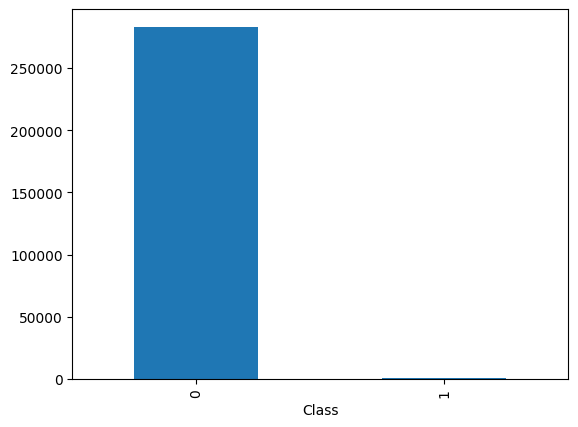

In [10]:
df['Class'].value_counts().plot(kind='bar')

### This Dataset is highly imbalanced. Perform sampling to make it balanced.

In [11]:
legit =df[df['Class']==0]
fraud = df[df['Class']==1]

In [12]:
legit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [13]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [14]:
legit.shape

(283253, 31)

In [15]:
fraud.shape

(473, 31)

In [16]:
legit_sample = legit.sample(n=473)

In [17]:
df = pd.concat([legit_sample, fraud], ignore_index=True)

In [18]:
df.shape

(946, 31)

In [19]:
df['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [20]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,121905.0,0.127436,0.091596,0.735793,-1.298233,-0.494486,0.365601,0.529362,-0.372069,-0.603677,...,-0.462415,-0.580971,0.342880,0.465106,-1.814987,0.074088,-0.095239,0.026431,100.00,0
1,152337.0,-0.180915,0.774520,-1.006955,-1.108605,1.458970,-1.315002,1.633799,-0.371429,-0.327809,...,0.257563,0.779616,-0.114689,0.611401,-0.256350,0.065177,0.368162,0.279090,38.52,0
2,83752.0,-1.607983,-0.264183,2.525932,0.865939,-0.752985,1.079509,-0.787969,0.369665,0.191220,...,-0.633279,-0.390177,-0.200751,-0.431991,0.498986,-0.085801,-0.027951,-0.231868,30.00,0
3,131830.0,2.073336,-0.014834,-2.035912,-0.021840,0.351010,-1.507357,0.612453,-0.380756,0.139040,...,0.196007,0.620820,-0.021251,0.040768,0.336949,0.225253,-0.095284,-0.091505,3.85,0
4,37717.0,-0.602465,1.298622,1.231384,1.016285,-0.399336,-0.875420,0.409570,0.226321,-0.875351,...,0.328815,0.908882,-0.096103,0.764883,-0.227829,-0.280735,0.061035,0.105577,18.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
942,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
943,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
944,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


#### Now Dataset is balanced.

### Seperate X and Y (Class)

In [21]:
x = df.drop(columns=['Time', 'Class'])
y = df[['Class']]

In [22]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.127436,0.091596,0.735793,-1.298233,-0.494486,0.365601,0.529362,-0.372069,-0.603677,0.630545,...,-0.412307,-0.462415,-0.580971,0.342880,0.465106,-1.814987,0.074088,-0.095239,0.026431,100.00
1,-0.180915,0.774520,-1.006955,-1.108605,1.458970,-1.315002,1.633799,-0.371429,-0.327809,-0.484224,...,0.053625,0.257563,0.779616,-0.114689,0.611401,-0.256350,0.065177,0.368162,0.279090,38.52
2,-1.607983,-0.264183,2.525932,0.865939,-0.752985,1.079509,-0.787969,0.369665,0.191220,0.944230,...,-0.022994,-0.633279,-0.390177,-0.200751,-0.431991,0.498986,-0.085801,-0.027951,-0.231868,30.00
3,2.073336,-0.014834,-2.035912,-0.021840,0.351010,-1.507357,0.612453,-0.380756,0.139040,0.221580,...,-0.328660,0.196007,0.620820,-0.021251,0.040768,0.336949,0.225253,-0.095284,-0.091505,3.85
4,-0.602465,1.298622,1.231384,1.016285,-0.399336,-0.875420,0.409570,0.226321,-0.875351,-0.488993,...,-0.033455,0.328815,0.908882,-0.096103,0.764883,-0.227829,-0.280735,0.061035,0.105577,18.40


In [23]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [24]:
y.value_counts()

Class
0        473
1        473
Name: count, dtype: int64

<Axes: xlabel='Class'>

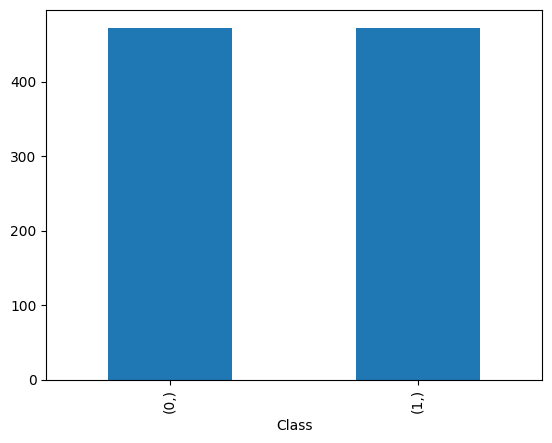

In [25]:
y.value_counts().plot(kind='bar')

### Create a pipeline for preprocessing

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [29]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [30]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.442821,-0.481726,0.676165,-1.107402,0.243944,0.625860,0.552690,-0.206970,0.319149,0.777279,...,-0.593112,-0.354252,-0.650655,0.336427,0.892991,-2.718619,0.056144,-0.227977,-0.050807,-0.016158
1,0.384966,-0.285228,0.387146,-1.047638,0.718454,-0.363089,0.750776,-0.206812,0.442517,0.520891,...,-0.143917,0.005876,0.758148,-0.074995,1.148731,-0.422973,0.036374,0.281938,0.584788,-0.260727
2,0.117206,-0.584095,0.973043,-0.425334,0.181152,1.045958,0.316421,-0.024324,0.674624,0.849424,...,-0.217784,-0.439717,-0.453100,-0.152378,-0.675233,0.689528,-0.298599,-0.153935,-0.700590,-0.294619
3,0.807929,-0.512349,0.216503,-0.705129,0.449322,-0.476280,0.567593,-0.209109,0.651289,0.683220,...,-0.512470,-0.024913,0.593725,0.009019,0.151201,0.450872,0.391534,-0.228026,-0.347489,-0.398645
4,0.305870,-0.134429,0.758354,-0.377950,0.267057,-0.104418,0.531205,-0.059621,0.197658,0.519794,...,-0.227869,0.041516,0.891995,-0.058284,1.417036,-0.380965,-0.731097,-0.056017,0.148293,-0.340764


### Apply Train Test Split

In [31]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=0.20, random_state=21)

In [32]:
xtrain.shape

(756, 29)

In [33]:
ytrain.shape

(756, 1)

In [34]:
xtrain.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
277,0.781110,-0.565197,0.444895,-0.171781,0.294305,0.176616,0.443120,-0.127711,1.146870,0.634377,...,-0.538108,-0.291718,-0.693116,0.247993,-0.040702,-0.028347,-1.914496,-0.084352,-0.228801,-0.354290
935,-0.989046,-0.611845,-0.081188,0.085283,0.970689,1.194793,-0.758990,-3.911256,0.797286,0.541554,...,-0.653675,-3.318756,2.280603,1.530160,0.325457,0.193414,2.571346,1.273150,0.128071,-0.364990
658,-1.225113,0.294982,-0.719976,1.505129,-0.906519,0.200417,-1.279417,0.315408,-1.421337,-1.176518,...,-0.639468,-0.168236,0.311847,0.074102,-0.646283,0.278129,0.623979,-0.154266,-0.510415,-0.384045
394,0.343551,-0.527722,0.735382,-1.369220,0.326379,0.797387,0.452779,-0.019857,1.276469,0.311392,...,-0.433587,-0.003634,0.779196,-0.213580,-1.946376,-0.094347,-1.601746,-0.105049,-0.066040,-0.195169
272,0.161458,-0.368449,0.859622,-0.509199,0.131139,0.300101,0.389628,-0.005827,-0.191796,0.747166,...,-0.755729,-0.323034,-0.978449,-0.043927,0.640856,-0.330792,-1.080970,-0.317722,-0.218617,-0.238927


In [35]:
ytrain.head()

,Class
277,0
935,1
658,1
394,0
272,0


In [36]:
xtest.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
321,-0.462551,0.230179,0.393376,-1.490418,0.082457,1.699942,-0.459566,-3.435540,0.721547,-0.061887,...,0.558710,-1.142780,1.157363,0.870196,-1.241304,-0.255081,1.068421,-0.230594,-0.673424,0.094829
822,0.204720,0.046562,-0.093527,-0.721550,0.353162,-0.623182,0.239397,-0.025580,-0.649687,-0.107440,...,-0.437198,-0.071894,-0.599427,-0.267460,0.767116,0.791816,1.636997,-0.283945,0.074421,-0.314509
931,0.298025,0.931246,-0.814501,1.746450,0.311525,-1.208393,-0.144681,0.230930,-1.380272,-0.735192,...,0.591610,0.171023,-0.676322,0.058469,-1.241934,-0.057442,1.073822,0.607436,0.365869,-0.410897
504,-0.468147,0.367904,-0.374295,1.170103,-0.168097,-0.489206,-0.347094,0.110303,0.004622,-0.319655,...,-0.395912,0.202665,0.214924,0.593550,-0.336340,-1.034181,-0.182760,-1.588631,1.657970,-0.293068
534,-3.047517,2.825669,-2.995337,1.204874,-3.146242,-2.029295,-2.206771,2.945710,-1.223531,-1.446964,...,1.325627,0.747950,-1.344572,-0.328133,0.247238,1.902815,-0.591807,1.669102,1.095856,-0.016197


In [37]:
ytest.head()

,Class
321,0
822,1
931,1
504,1
534,1


### Algo Evaluation

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [39]:
dct = {'Logistic': LogisticRegression(),
       'Decision Tree': DecisionTreeClassifier(),
       'Random Forest': RandomForestClassifier(),
       'Gradient Boost': GradientBoostingClassifier()}

In [40]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier())])

In [41]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
for name, model in dct.items():
    model.fit (xtrain, ytrain)
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    f1_tr = f1_score(ytrain, ypred_tr, average='macro')
    f1_ts = f1_score(ytest, ypred_ts, average='macro')
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
    f1_cv = scores.mean()
    print(f'Model Name: {name}\n')
    print(f'Train F1 : {f1_tr:.4f}')
    print(f'Test F1 : {f1_ts:.4f}')
    print(f'Cross Validated F1 : {f1_cv:.4f}') 
    print('\n======================================\n')                        

Model Name: Logistic

Train F1 : 0.9444
Test F1 : 0.9631
Cross Validated F1 : 0.9363


Model Name: Decision Tree

Train F1 : 1.0000
Test F1 : 0.9158
Cross Validated F1 : 0.8781


Model Name: Random Forest

Train F1 : 1.0000
Test F1 : 0.9631
Cross Validated F1 : 0.9350


Model Name: Gradient Boost

Train F1 : 0.9987
Test F1 : 0.9684
Cross Validated F1 : 0.9311




#### Random forest algorithm is selected as it has highest cross validation score i.e 93%

In [42]:
from sklearn.ensemble import RandomForestClassifier
best_model = RandomForestClassifier()
best_model.fit(xtrain, ytrain)

RandomForestClassifier()

In [43]:
best_model.score(xtrain, ytrain)

1.0

In [44]:
best_model.score(xtest, ytest)

0.9736842105263158

### Predict the results for Train and Test

In [45]:
ypred_tr = best_model.predict(xtrain)
ypred_ts = best_model.predict(xtest)

In [46]:
ypred_tr[0:5]

array([0, 1, 1, 0, 0], dtype=int64)

In [47]:
ytrain.head()

,Class
277,0
935,1
658,1
394,0
272,0


In [48]:
ypred_ts[0:5]

array([0, 1, 1, 1, 1], dtype=int64)

In [49]:
ytest.head()

,Class
321,0
822,1
931,1
504,1
534,1


### Plot the Confusion Matrix

In [50]:
best_model.classes_

array([0, 1], dtype=int64)

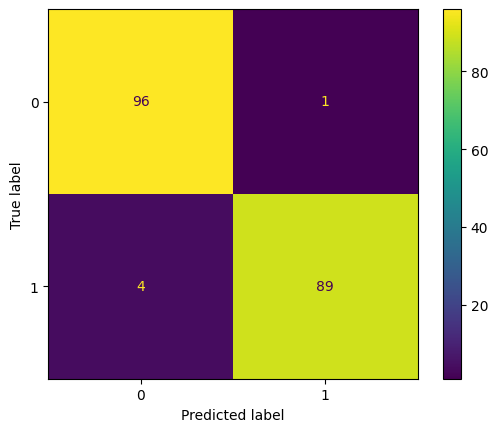

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_model.classes_)
cfd.plot()

### Print the classification report

In [52]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        97
           1       0.99      0.96      0.97        93

    accuracy                           0.97       190
   macro avg       0.97      0.97      0.97       190
weighted avg       0.97      0.97      0.97       190



## As model accuracy is 97%. This model is good.

### Plot the Roc AUC Scores

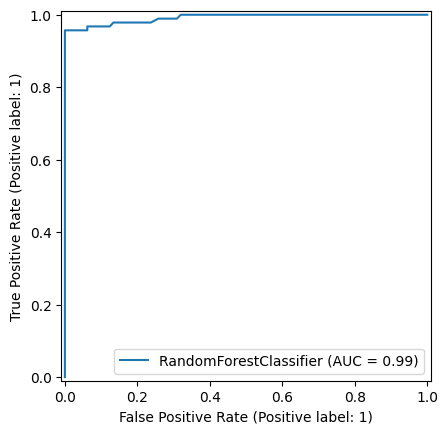

In [53]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_model, xtest, ytest)